In [1]:
include("../path.jl")
include("../ToolBox/ToolBox.jl")
import FileIO
using .ToolBox
using .Geometry
using Colors

In [2]:
function coherrence_combo(master_view,meta,precise_orbit,dem,slave_data_path,master_data_path,kernel = ones(4,14))
    slave_data,flat,lut =  coregister_slave(master_view,slave_data_path,meta,precise_orbit,dem)
    slave_data,mosaic_view = SlcUtil.mosaic(slave_data,master_view,meta[1]);
    flat,mosaic_view = SlcUtil.mosaic(flat,master_view,meta[1]);

    master_data = Load.slc_data(master_data_path,master_view);
    master_data,mosaic_view = SlcUtil.mosaic(master_data,master_view,meta[1]);
    kernel = ones(4,14)
    complex_coherence, master_intensity, slave_intensity, lines, samples = SlcUtil.complex_coherence(master_data, slave_data, flat, kernel, mosaic_view);
end

coherrence_combo (generic function with 2 methods)

In [3]:
master_view = [2000:6000,1000:9000]
small = 5001:8001;

In [4]:
# load meta and pod
master_meta = Load.slc_meta(master_meta_path);
master_precise_orbit = Load.precise_orbit(master_pod_path,master_meta["t_0"]);
slave_meta = Load.slc_meta(slave_meta_path);
slave_precise_orbit = Load.precise_orbit(slave_pod_path,slave_meta["t_0"]);

meta = (master_meta,slave_meta)
precise_orbit = (master_precise_orbit,slave_precise_orbit);

In [5]:
# load DEM
footprint = SlcUtil.footprint(master_meta, master_view)
latlon_window = ((minimum(footprint[1]), maximum(footprint[1])), (minimum(footprint[2]), maximum(footprint[2])))
dem = Load.dem(dem_path, latlon_window; nan_fill= 0, padding=[90,90]);

In [6]:
# not compiled
@time complex_coherence, master_intensity, slave_intensity, lines, samples = coherrence_combo(master_view,meta,precise_orbit,dem,slave_data_path,master_data_path);

 95.228179 seconds (793.24 M allocations: 82.570 GiB, 13.61% gc time)


In [11]:
# compiled
@time complex_coherence, master_intensity, slave_intensity, lines, samples = coherrence_combo(master_view,meta,precise_orbit,dem,slave_data_path,master_data_path);


 90.342091 seconds (760.83 M allocations: 80.984 GiB, 16.65% gc time)


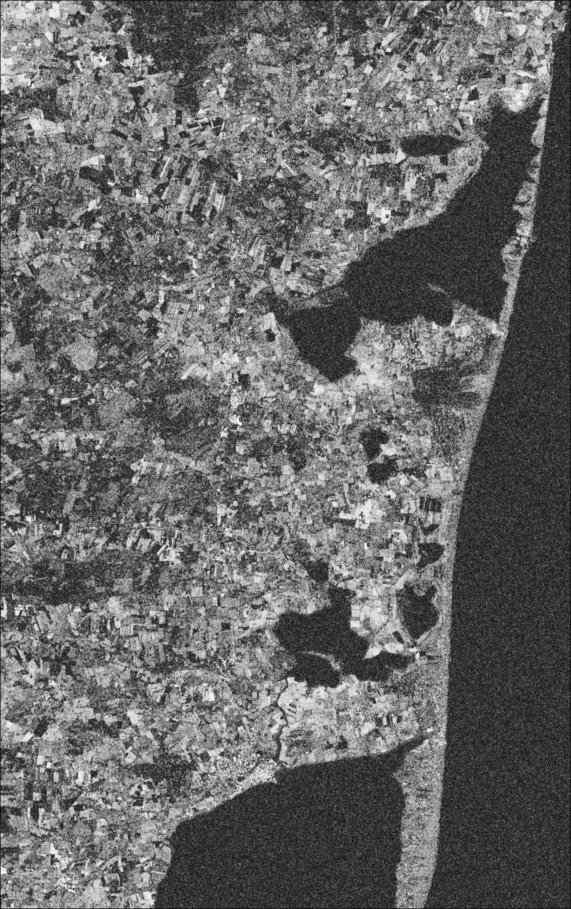

In [13]:
Gray.(abs.(complex_coherence[1:2:end,1:7:end]))

In [ ]:
4000 x 8000